1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


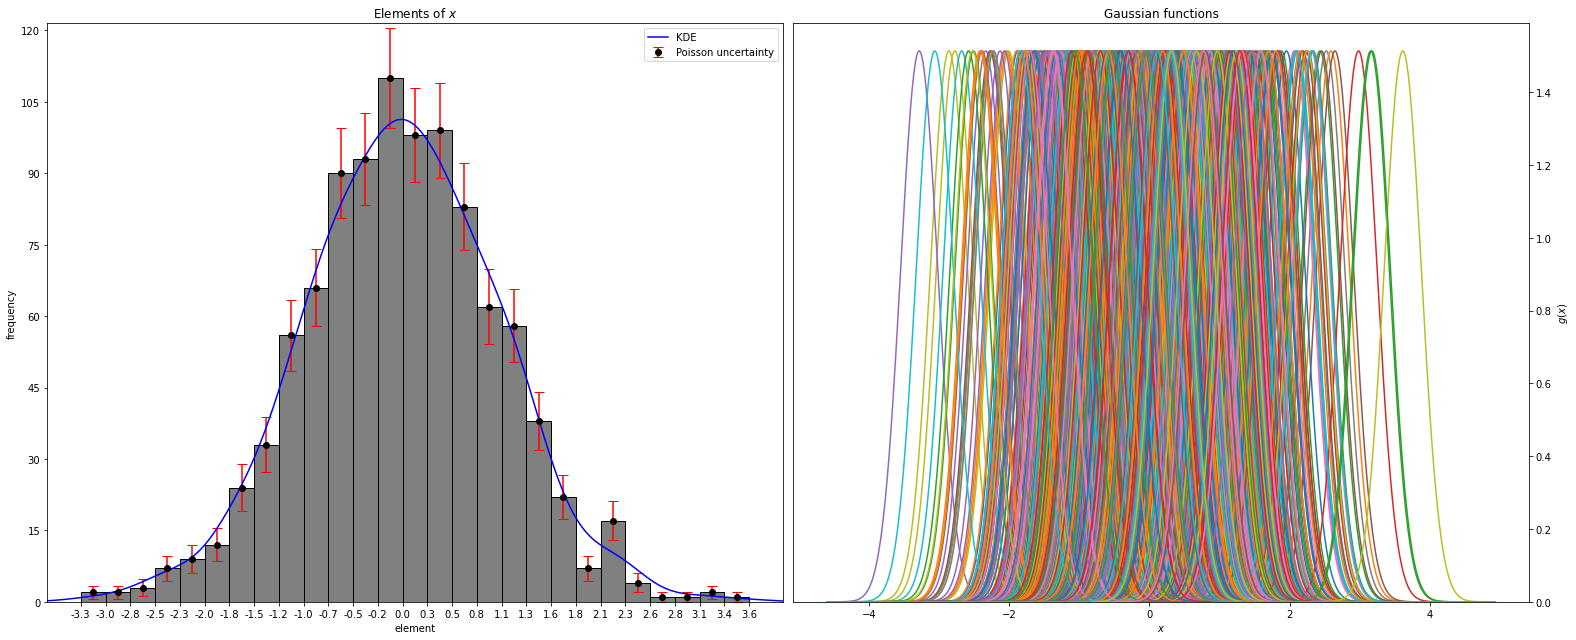

In [1]:
# filling the NumPy array 'x'
import numpy as np
import numpy.random as npr
seed = 5
npr.seed(seed)
N = 1000
mean = 0   # mean of the normal distribution
std = 1   # standard deviation of the normal distribution
x = npr.normal(loc=mean, scale=std, size=N)

# filling the histogram
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 9))
bins_values, bins_edges, _ = ax1.hist(x, bins='auto', color='grey', edgecolor='black')   # 'auto': maximum of the Sturges and Freedman–Diaconis estimators
ax1.set_xlabel('element')
ax1.set_ylabel('frequency')
ax1.set_title('Elements of $x$')
ax1.set_xticks(bins_edges)
ax1.set_xticklabels(np.around(bins_edges, 1))
ax1.yaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True))
errors = np.sqrt(bins_values)   # computing poisson uncertainties
bins_centers = (bins_edges[:-1]+bins_edges[1:])/2
ax1.errorbar(x=bins_centers, y=bins_values, yerr=errors, fmt='o', color='black', ecolor='red', capsize=5, label='Poisson uncertainty')
ax1.set_ylim(top=(bins_values+errors).max()+1)

# creating the gaussians
import pandas as pd
from scipy.stats import norm
std = 1.06*x.std()*(x.size**(-1/5))
linspace = np.linspace(start=x.min()-(5*std), stop=x.max()+(5*std), num=N)
gaussians = np.array([norm.pdf(x=linspace, loc=i, scale=std) for i in x])

# plotting all the gaussians in 'ax2'
for i in range(len(gaussians)):
    ax2.plot(linspace, gaussians[i])
ax2.set_ylim(bottom=0)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$g(x)$')
ax2.set_title('Gaussian functions')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

# summing all the gaussians and normalizing the result
from scipy.integrate import trapezoid as integral
sum = np.sum(gaussians, axis=0)
sum *= (integral(y=bins_values, x=bins_centers)/integral(y=sum, x=linspace))   # normalizing
ax1.autoscale(False)   # to draw 'sum' on 'ax1' without autoscaling
ax1.plot(linspace, sum, color='blue', label='KDE')
ax1.legend()
plt.tight_layout()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

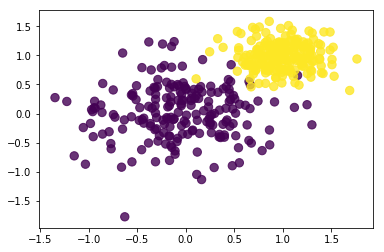

In [2]:
import wget
from IPython.display import Image
#wget.download('https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png')
Image('two_categories_scatter_plot.png')

In [3]:
# writing the function that generates the 2D dataset
def dataset_2D(n_categories, n_samples):
    from sklearn.datasets import make_spd_matrix as spd
    small_dfs = []
    for i in range(n_categories):
        mean_i = npr.randint(5*n_categories, size=2)
        cov_i = spd(n_dim=2)
        df_i = pd.DataFrame(npr.multivariate_normal(mean=mean_i, cov=cov_i, size=n_samples), columns=['x', 'y'])
        df_i['category'] = i+1
        small_dfs.append(df_i)
    df = pd.concat(small_dfs, ignore_index=True)
    return df

n_categories = 10   # number of categories (>= 2)
n_samples = 1000  # number of samples for each category
df = dataset_2D(n_categories, n_samples)
df

,x,y,category
0,17.067857,19.569223,1
1,15.111510,20.494884,1
2,13.623105,19.835848,1
3,17.978896,20.430053,1
4,13.538284,20.837115,1
...,...,...,...
9995,2.103719,47.791835,10
9996,0.525106,48.309532,10
9997,0.396826,48.498444,10
9998,-0.695200,47.655683,10


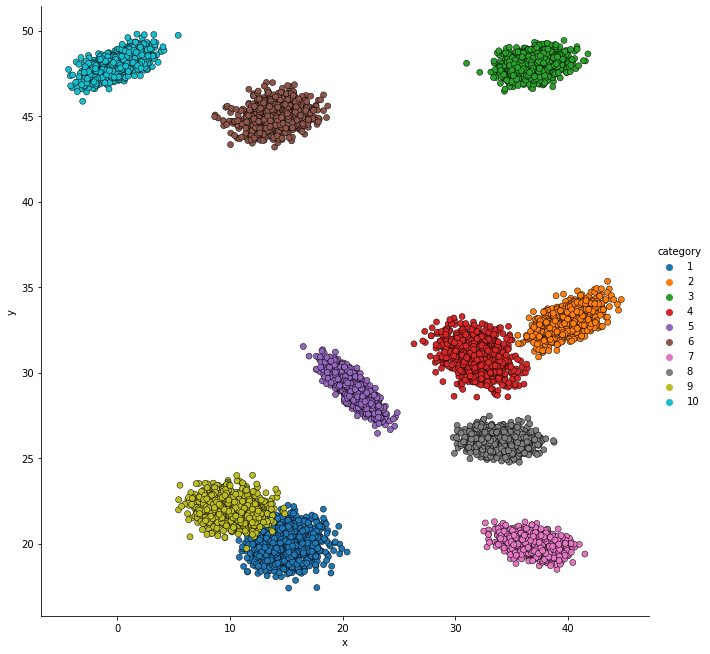

In [4]:
# displaying the dataset 'df' in a scatter plot
import seaborn as sns
sns.relplot(data=df, x='x', y='y', hue='category', height=9, palette='tab10', edgecolor='black')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
# downloading the dataset and loading it as a pandas DataFrame
#wget.download('https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy')
file = np.load('residuals_261.npy', allow_pickle=True)
df = pd.DataFrame(file.item())

# inspecting the dataset
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [6]:
# cleaning the dataset
df = df[abs(df['residuals']) < 2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


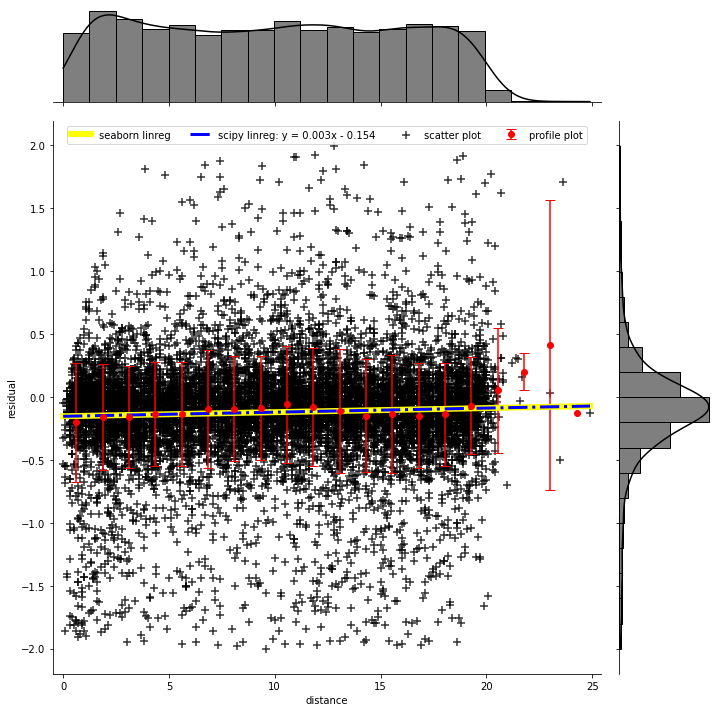

In [7]:
# performing a linear regression of 'residuals' versus 'distances' using 'scipy.stats.linregress()'
from scipy.stats import linregress
linreg = linregress(df['distances'], df['residuals'])
if linreg.intercept > 0:
    linreg_label = 'scipy linreg: y = %.3fx + %.3f' % (linreg.slope, linreg.intercept)
else:
    linreg_label = 'scipy linreg: y = %.3fx - %.3f' % (linreg.slope, abs(linreg.intercept))

# plotting a seaborn jointplot of 'residuals' versus 'distances', having seaborn performing a linear regression
n_bins = 20
jp = sns.jointplot(data=df, x='distances', y='residuals', kind='reg', height=10,
                   scatter_kws={'s':50}, color='black', marker='+', label='scatter plot',
                   joint_kws={'line_kws':{'color':'yellow', 'label':'seaborn linreg', 'linewidth':6}},
                   marginal_kws={'color':'black', 'bins':n_bins})

# filling the NumPy array 'x'
bins_size = (df['distances'].max()-df['distances'].min())/n_bins
bins_edges = np.linspace(start=df['distances'].min(), stop=df['distances'].max(), num=n_bins+1)
x = bins_edges[:-1]+(bins_size/2)

# filling the NumPy array 'y'
temp = df.groupby(pd.cut(df['distances'], bins_edges))
y = np.array(temp.mean()['residuals'])

# filling the NumPy array 'erry'
erry = np.array(temp.std()['residuals'])

# plotting the profile plot
ax = jp.ax_joint
ax.errorbar(x=x, y=y, yerr=erry, fmt='o', color='red', capsize=5, label='profile plot')
ax.plot(bins_edges, (linreg.slope*bins_edges)+linreg.intercept, color='blue', linestyle='dashdot', linewidth=3, label=linreg_label)
ax.set_xlim(df['distances'].min()-0.5, df['distances'].max()+0.5)
ax.set_xlabel('distance')
ax.set_ylabel('residual')
ax.legend(loc='upper center', ncol=4)